# Analyse de Time Series Simples

## 1. Imports

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tslearn.clustering import TimeSeriesKMeans

sns.set_theme(style="whitegrid")

/opt/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


## 2. Initialisation

In [ ]:
tseries = pd.read_csv("clients_menages_tabular_transfo.csv")
tseries.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id_client,date,mnt_ttc_echeance_std,mnt_solde_charges_ccl_std,mnt_ttc_facture_ccl_std,mnt_sls_ccl_std,mnt_aides_ccl_std,mnt_total_encaisse_std,solde_std,...,elo_mode_chauffage,geo_localite,terme_lib,age_std_x,type_trf_lib,elo_categ_financement_inii,cnc_tem_apl,cnc_tem_sls,mnt_caution_dg_ccl_std,cnc_dtdval
0,0,0,20180131,528.85,0.0,528.85,0.0,0.0,530.0,-81.18,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31
1,1,0,20180228,528.85,0.0,528.85,0.0,0.0,530.0,-82.33,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31
2,2,0,20180331,528.85,0.0,528.85,0.0,0.0,530.0,-83.48,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31
3,3,0,20180430,528.85,0.0,528.85,0.0,0.0,530.0,-84.63,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31
4,4,0,20180531,528.85,0.0,528.85,0.0,0.0,530.0,-85.78,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31


In [ ]:
tseries.date = pd.to_datetime(tseries.date, format='%Y%m%d')

data = tseries[["id_client", "date", "solde_std"]]


#tseries['dette'] = - tseries.solde_std
#tseries = tseries.drop(columns='solde')

In [ ]:
tseries.head()

,Unnamed: 0,id_client,date,mnt_ttc_echeance_std,mnt_solde_charges_ccl_std,mnt_ttc_facture_ccl_std,mnt_sls_ccl_std,mnt_aides_ccl_std,mnt_total_encaisse_std,solde_std,...,elo_mode_chauffage,geo_localite,terme_lib,age_std_x,type_trf_lib,elo_categ_financement_inii,cnc_tem_apl,cnc_tem_sls,mnt_caution_dg_ccl_std,cnc_dtdval
0,0,0,2018-01-31,528.85,0.0,528.85,0.0,0.0,530.0,-81.18,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31
1,1,0,2018-02-28,528.85,0.0,528.85,0.0,0.0,530.0,-82.33,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31
2,2,0,2018-03-31,528.85,0.0,528.85,0.0,0.0,530.0,-83.48,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31
3,3,0,2018-04-30,528.85,0.0,528.85,0.0,0.0,530.0,-84.63,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31
4,4,0,2018-05-31,528.85,0.0,528.85,0.0,0.0,530.0,-85.78,...,-1,Non RenseignÃ©,TERME ECHU,50.0,Relocation,PLC,0.0,0.0,0.0,2018-01-31


In [ ]:
tseries1 = tseries[tseries.id_client == 0]
print(tseries1.solde_std.values)

[ -81.18  -82.33  -83.48  -84.63  -85.78  -86.93  -88.08 -158.18    0.67
   -0.48   -1.63   -2.78   -3.93    0.97    5.87   10.77   -4.33  -19.43
  -34.53 -112.29 -127.39]


<AxesSubplot:xlabel='date', ylabel='solde_std'>

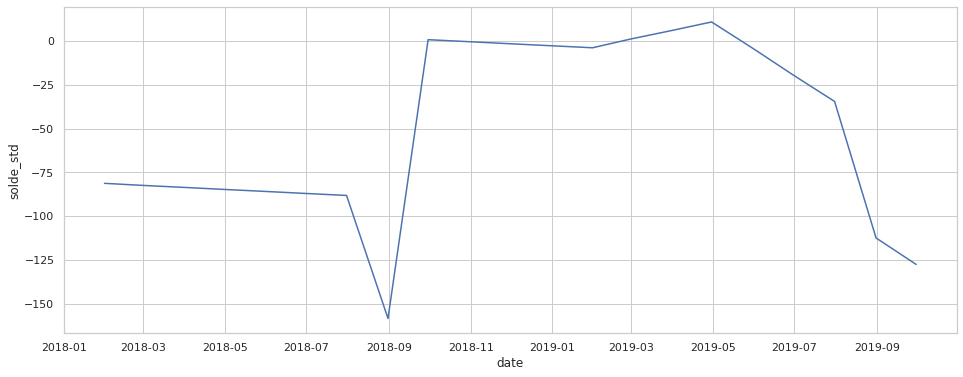

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='date', y='solde_std', data=tseries1)

## 3. Visualisation

In [ ]:
tdettes = tseries[tseries.solde_std > 0]

len(tdettes.id_client.unique())

2726

On observe que 30360 clients uniques ont été en situation de dette au moins une fois

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '2018-09-30T00:00:00.000000000'),
  Text(1, 0, '2019-02-28T00:00:00.000000000'),
  Text(2, 0, '2019-03-31T00:00:00.000000000'),
  Text(3, 0, '2019-04-30T00:00:00.000000000'),
  Text(4, 0, '2018-01-31T00:00:00.000000000'),
  Text(5, 0, '2018-02-28T00:00:00.000000000'),
  Text(6, 0, '2018-03-31T00:00:00.000000000'),
  Text(7, 0, '2018-04-30T00:00:00.000000000'),
  Text(8, 0, '2018-05-31T00:00:00.000000000'),
  Text(9, 0, '2018-06-30T00:00:00.000000000'),
  Text(10, 0, '2018-07-31T00:00:00.000000000'),
  Text(11, 0, '2018-08-31T00:00:00.000000000'),
  Text(12, 0, '2018-10-31T00:00:00.000000000'),
  Text(13, 0, '2019-01-31T00:00:00.000000000'),
  Text(14, 0, '2019-05-31T00:00:00.000000000'),
  Text(15, 0, '2019-06-30T00:00:00.000000000'),
  Text(16, 0, '2019-07-31T00:00:00.000000000'),
  Text(17, 0, '2018-12-31T00:00:00.000000000'),
  Text(18, 0, '2019-09-30T00:00:00.000000000

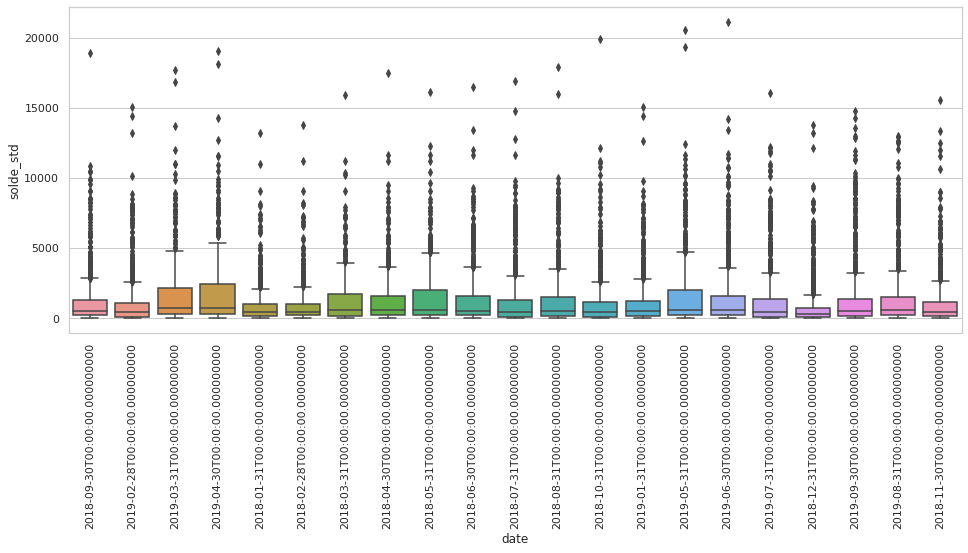

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='date', y='solde_std', data=tdettes)
plt.xticks(rotation = 90)

On voit que la plupart des dettes se concentrent en dessous de 5000€, certaines personnes ont cependant une dette qui approche les 20000€

<AxesSubplot:xlabel='date', ylabel='solde_std'>

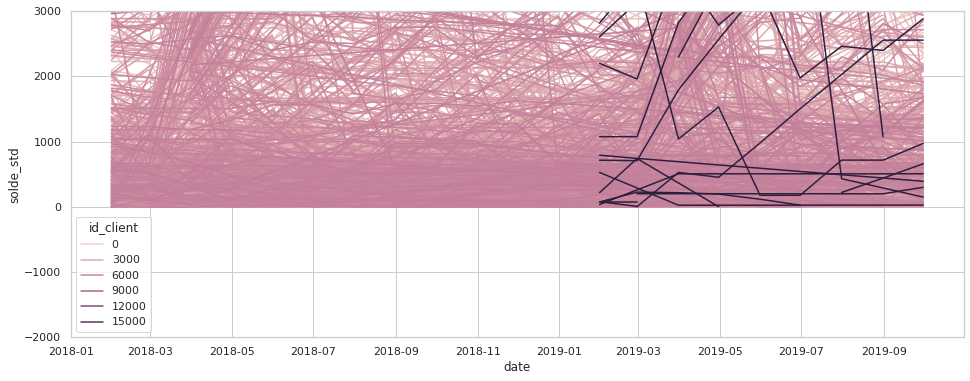

In [ ]:
client_serie = tseries[(tseries.solde_std <= 80000) & (tseries.solde_std > 0)]

plt.figure(figsize=(16, 6))
plt.ylim(-2000, 3000)
sns.lineplot(x='date', y='solde_std', hue='id_client', data=client_serie)

Graphique de l'évolution de la dette pour les 622 premiers clients

## 4. Clustering

In [ ]:
tseries_array

In [ ]:
#Moving Average
dates = ['2018-01-31', '2018-02-28',
 '2018-03-31', '2018-04-30',
 '2018-05-31', '2018-06-30',
 '2018-07-31', '2018-08-31',
 '2018-09-30', '2018-10-31',
 '2018-11-30', '2018-12-31',
 '2019-01-31', '2019-02-28',
 '2019-03-31', '2019-04-30',
 '2019-05-31', '2019-06-30',
 '2019-07-31', '2019-08-31',
 '2019-09-30']
MA_df = tseries[["id_client", "date", "solde_std"]]

MA = MA_df.groupby("date").solde_std.mean().reset_index(drop=True)
print(MA)

#ARIMA

#2 - Months Moving Average
MA = MA.to_frame()
MA['MA_2m'] = MA.iloc[:, 0].rolling(window=2).mean()
MA['MA_3m'] = MA.iloc[:, 0].rolling(window=3).mean()
MA['date'] = dates
print(MA)

plt.plot(MA['date'], MA['MA_3m'], 'r') # plotting t, a separately 
plt.plot(MA['date'], MA['MA_3m'], 'b') # plotting t, b separately 
plt.plot(MA['date'], MA['MA_3m'], 'g') # plotting t, c separately 
plt.show()



"""ax.set_xticks(range(21))
plt.xlabel("Date")
plt.ylabel("MA_2m")
ax.set_xticklabels(dates)
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(14, 8))
g = sns.factorplot(x="date", y="MA_3m", data=MA)
ax.set_xticks(range(21))
plt.xlabel("Date")
plt.ylabel("MA_2m")
ax.set_xticklabels(dates)
plt.xticks(rotation=45)
plt.show()"""



0      83.326097
1      88.619510
2     153.268850
3     141.436648
4     142.285176
5     136.928424
6     105.643595
7     116.409600
8     114.581237
9      99.131035
10    102.773029
11     98.993428
12    115.866585
13    112.100259
14    190.899170
15    176.292324
16    163.782961
17    148.797538
18    122.015646
19    147.377596
20    124.496529
Name: solde_std, dtype: float64
     solde_std       MA_2m       MA_3m        date
0    83.326097         NaN         NaN  2018-01-31
1    88.619510   85.972804         NaN  2018-02-28
2   153.268850  120.944180  108.404819  2018-03-31
3   141.436648  147.352749  127.775003  2018-04-30
4   142.285176  141.860912  145.663558  2018-05-31
5   136.928424  139.606800  140.216749  2018-06-30
6   105.643595  121.286010  128.285732  2018-07-31
7   116.409600  111.026597  119.660540  2018-08-31
8   114.581237  115.495418  112.211477  2018-09-30
9    99.131035  106.856136  110.040624  2018-10-31
10  102.773029  100.952032  105.495100  2018-11-30

NameError: name 'figure' is not defined

In [ ]:
from tslearn.generators import random_walks
from tslearn.utils import to_time_series_dataset
X = random_walks(n_ts=50, sz=32, d=1)
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0).fit(X)
print(km.cluster_centers_.shape)

km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,max_iter_barycenter=5,random_state=0).fit(X)
print(km_dba.cluster_centers_.shape)

km_sdtw = TimeSeriesKMeans(n_clusters=3, metric="softdtw", max_iter=5, max_iter_barycenter=5,metric_params={"gamma": .5},random_state=0).fit(X)
print(km_sdtw.cluster_centers_.shape)

X_bis = to_time_series_dataset([[1, 2, 3, 4], [1, 2, 3],[2, 5, 6, 7, 8, 9]])
km = TimeSeriesKMeans(n_clusters=2, max_iter=5,metric="dtw", random_state=0).fit(X_bis)
print(km.cluster_centers_.shape)


In [ ]:
tseries1 = tseries[tseries.id_client == 0]
print(tseries1.solde_std.values)
to_predict= tseries1.solde_std.values[-1]
print(to_predict)
train = tseries1.solde_std.values[:-2]

In [ ]:
!pip install statsmodels==0.12.1

    lag       acf
0     0  1.000000
1     1  0.496300
2     2  0.175968
3     3 -0.046859
4     4 -0.238242
5     5 -0.169400
6     6 -0.219843
7     7 -0.189732
8     8 -0.182946
9     9 -0.016763
10   10  0.098992
11   11  0.161166
12   12  0.245253
13   13 -0.012013
14   14 -0.201406
15   15 -0.172456
16   16 -0.141774
17   17 -0.015233
18   18 -0.035613
19   19 -0.044419
20   20  0.009019
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


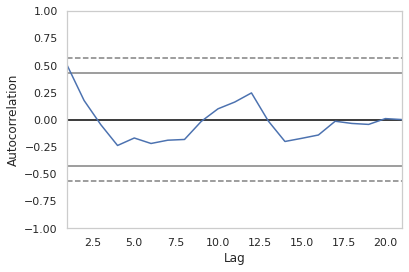

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(MA["solde_std"])
from statsmodels.tsa.stattools import acf
result_acf=acf(MA["solde_std"])
print(pd.DataFrame({"lag":range(21),"acf":result_acf}).iloc[:,:])


# I - AR

# I - ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from collections import defaultdict
size = int(len(MA) * 0.6)
train, test = MA.iloc[0:size, 0].tolist(), MA.iloc[size:len(MA), 0].tolist()

error = defaultdict(np.float)
for i in range(0, 3) :
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)) :
        model = ARIMA(history, order=(1,0,i))
        model_fit = model.fit() 
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        error[i] += np.square(yhat - obs)

print(error)
error_df = pd.DataFrame({"items" :["q="+str(i) for i in error.keys()], "RMSE": [np.sqrt(x[1]) for x in error.items()]})
print(error_df)

defaultdict(<class 'float'>, {0: 8400.81636154862, 1: 9975.802108680226, 2: 13319.767760146553})
  items        RMSE
0   q=0   91.655967
1   q=1   99.878937
2   q=2  115.411298


34.8206754359204


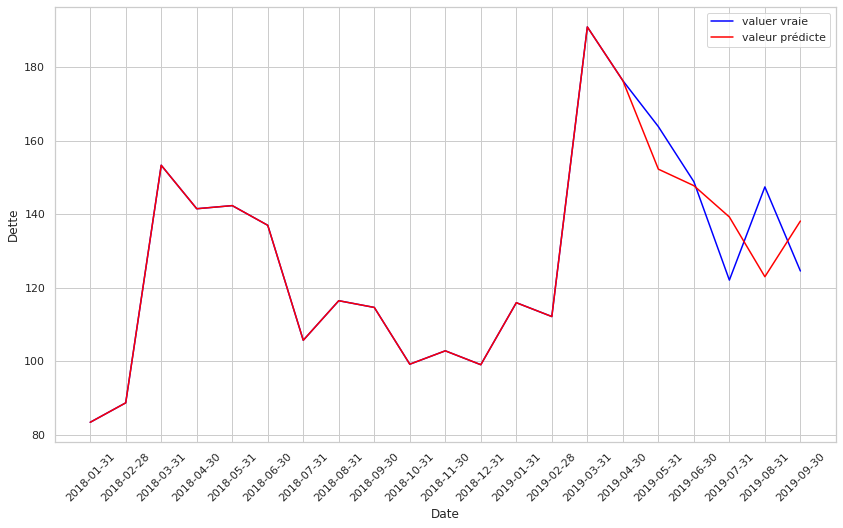

In [ ]:
size = int(len(MA) * 0.8)
train, test = MA.iloc[0:size, 0].tolist(), MA.iloc[size:len(MA), 0].tolist()
dates = ['2018-01-31', '2018-02-28',
 '2018-03-31', '2018-04-30',
 '2018-05-31', '2018-06-30',
 '2018-07-31', '2018-08-31',
 '2018-09-30', '2018-10-31',
 '2018-11-30', '2018-12-31',
 '2019-01-31', '2019-02-28',
 '2019-03-31', '2019-04-30',
 '2019-05-31', '2019-06-30',
 '2019-07-31', '2019-08-31',
 '2019-09-30']

history = [x for x in train]
predictions = list()
error = 0
for t in range(len(test)) :
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit() 
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    error += np.square(obs - yhat)

print(np.sqrt(error))
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(MA.solde_std.to_list(), color="blue")
plt.plot(train + predictions, color="red")
plt.legend(["valuer vraie", "valeur prédicte"])
plt.xlabel("Date")
plt.ylabel("Dette")
ax.set_xticks(range(21))
ax.set_xticklabels(dates)
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install statsmodels.tsa.arima_model

ERROR: Could not find a version that satisfies the requirement statsmodels.tsa.arima_model (from versions: none)
ERROR: No matching distribution found for statsmodels.tsa.arima_model
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#AR,ARMA,ARIMA

from statsmodels.tsa.arima_model import ARMA
from collections import defaultdict
size = int(len(MA) * 0.6)
train, test = MA.iloc[0:size, 0].tolist(), MA.iloc[size:len(MA), 0].tolist()

error = defaultdict(np.float)
for i in range(1, 6) :
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)) :
        model = ARMA(history, order=(i,0))
        model_fit = model.fit() 
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        error[i] += np.square(yhat - obs)

print(error)
error_df = pd.DataFrame({"items" :["p="+str(i) for i in error.keys()], "RMSE": [np.sqrt(x[1]) for x in error.items()]})
print(error_df)

/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:5

# II - ARMA

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple

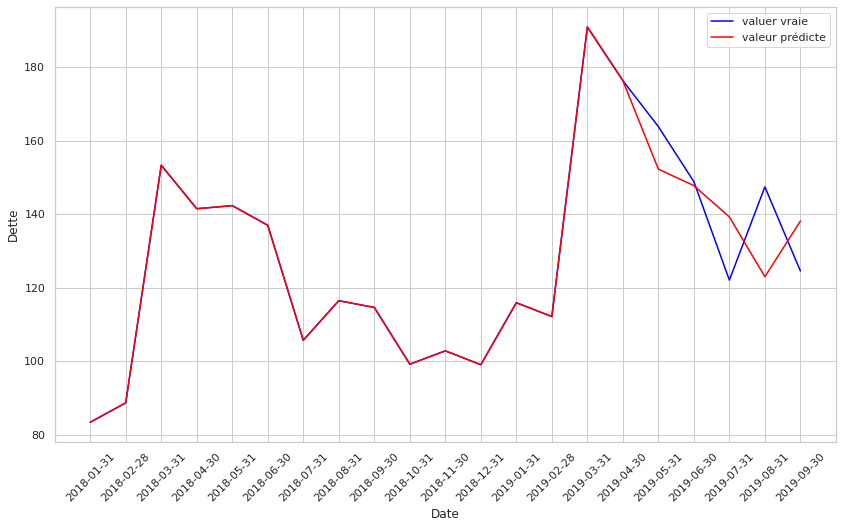

In [ ]:
size = int(len(MA) * 0.8)
train, test = MA.iloc[0:size, 0].tolist(), MA.iloc[size:len(MA), 0].tolist()
dates = ['2018-01-31', '2018-02-28',
 '2018-03-31', '2018-04-30',
 '2018-05-31', '2018-06-30',
 '2018-07-31', '2018-08-31',
 '2018-09-30', '2018-10-31',
 '2018-11-30', '2018-12-31',
 '2019-01-31', '2019-02-28',
 '2019-03-31', '2019-04-30',
 '2019-05-31', '2019-06-30',
 '2019-07-31', '2019-08-31',
 '2019-09-30']

history = [x for x in train]
predictions = list()
for t in range(len(test)) :
    model = ARMA(history, order=(1, 0))
    model_fit = model.fit() 
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(MA.solde_std.to_list(), color="blue")
plt.plot(train + predictions, color="red")
plt.legend(["valuer vraie", "valeur prédicte"])
plt.xlabel("Date")
plt.ylabel("Dette")
ax.set_xticks(range(21))
ax.set_xticklabels(dates)
plt.xticks(rotation=45)
plt.show()

In [ ]:
p = d = q = range(0, 4)
import itertools
pdq = list(itertools.product(p, d, q))
aic_test = dict()
for param in pdq:
    mod = ARIMA(MA["solde_std"].tolist(), order = param)
    results = mod.fit()
    aic_test[param] = results.aic



/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximu

{(0, 0, 0): 203.7200307888724,
 (0, 0, 1): 200.21393025441347,
 (0, 0, 2): 200.48151095730282,
 (0, 0, 3): 201.1859480196899,
 (0, 1, 0): 190.7927755430513,
 (0, 1, 1): 192.15453092747765,
 (0, 1, 2): 194.04487816858085,
 (0, 1, 3): 193.9034028074395,
 (0, 2, 0): 198.42718013169403,
 (0, 2, 1): 187.21289696139695,
 (0, 2, 2): 188.86129117845877,
 (0, 2, 3): 190.07921141628083,
 (0, 3, 0): 208.99954779269825,
 (0, 3, 1): 193.9458829836605,
 (0, 3, 2): 186.61610648253162,
 (0, 3, 3): 188.48271105025705,
 (1, 0, 0): 199.13203089845166,
 (1, 0, 1): 201.07955622925343,
 (1, 0, 2): 201.85664186270125,
 (1, 0, 3): 203.70261922282037,
 (1, 1, 0): 192.10122936478513,
 (1, 1, 1): 194.05389595289833,
 (1, 1, 2): 195.82453837118288,
 (1, 1, 3): 194.9900314505696,
 (1, 2, 0): 190.34280746933456,
 (1, 2, 1): 188.7850113483278,
 (1, 2, 2): 191.14277740358892,
 (1, 2, 3): 191.93173550367587,
 (1, 3, 0): 196.3751813870631,
 (1, 3, 1): 187.26916360930875,
 (1, 3, 2): 188.2594389527732,
 (1, 3, 3): 190.6

In [ ]:
aic_df = pd.DataFrame({"items" :["p, d, q=" + str(i) for i in aic_test.keys()], "aic": [x[1] for x in aic_test.items()]})
aic_df[aic_df.aic == min(aic_df.aic)]

,items,aic
14,"p, d, q=(0, 3, 2)",186.616106


/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
103.22551374933207


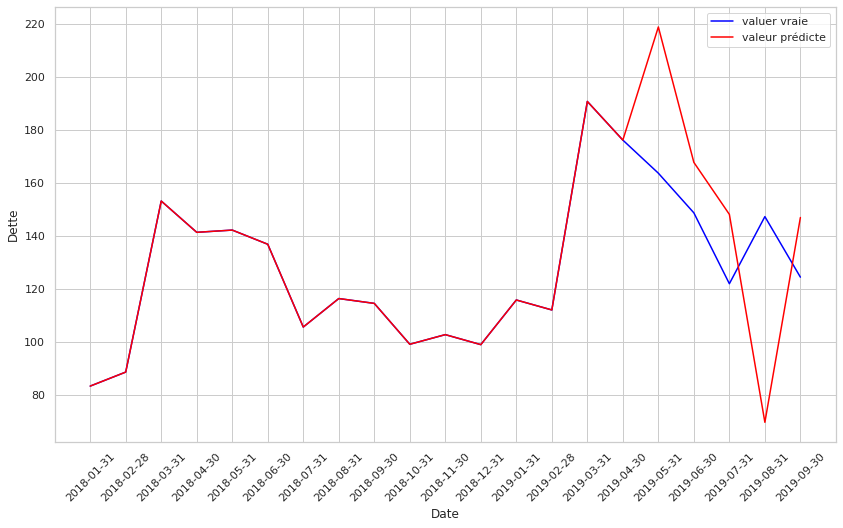

In [ ]:
size = int(len(MA) * 0.8)
train, test = MA.iloc[0:size, 0].tolist(), MA.iloc[size:len(MA), 0].tolist()
dates = ['2018-01-31', '2018-02-28',
 '2018-03-31', '2018-04-30',
 '2018-05-31', '2018-06-30',
 '2018-07-31', '2018-08-31',
 '2018-09-30', '2018-10-31',
 '2018-11-30', '2018-12-31',
 '2019-01-31', '2019-02-28',
 '2019-03-31', '2019-04-30',
 '2019-05-31', '2019-06-30',
 '2019-07-31', '2019-08-31',
 '2019-09-30']

history = [x for x in train]
predictions = list()
error = 0
for t in range(len(test)) :
    model = ARIMA(history, order=(0,3,2))
    model_fit = model.fit() 
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    error += np.square(yhat - obs)

print(np.sqrt(error))
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(MA.solde_std.to_list(), color="blue")
plt.plot(train + predictions, color="red")
plt.legend(["valuer vraie", "valeur prédicte"])
plt.xlabel("Date")
plt.ylabel("Dette")
ax.set_xticks(range(21))
ax.set_xticklabels(dates)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AR
import warnings
warnings.filterwarnings("ignore")
mod = AR(MA["solde_std"].tolist(), missing="drop")
results = mod.fit()
print(results.aic)

7.387309112802336


21.55269655381742


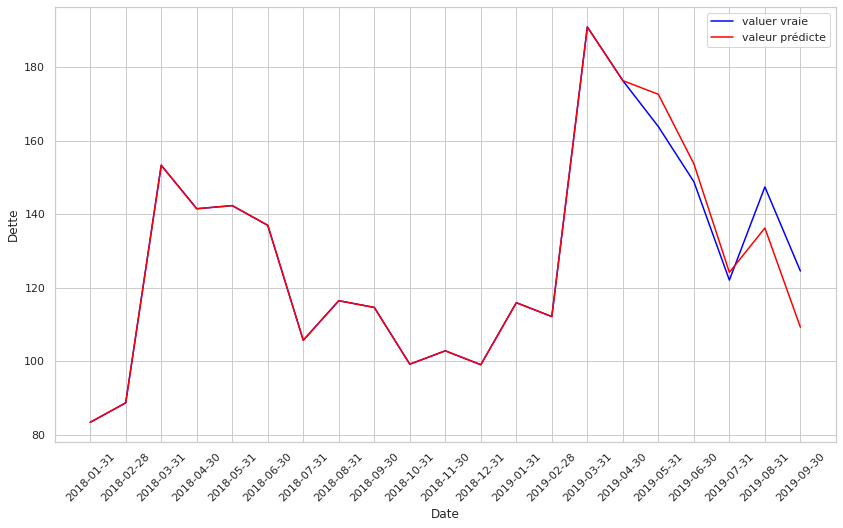

In [ ]:
predictions = list()

model = AR(MA.solde_std.to_list())
model_fit = model.fit() 
output = model_fit.predict(size, len(MA.solde_std.to_list())-1)
predictions.extend(output)
obs = test[t]

error = np.sum(np.square(np.array(test) - np.array(output[0:len(test)])))
print(np.sqrt(error))

fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(MA.solde_std.to_list(), color="blue")
plt.plot(train + predictions, color="red")
plt.legend(["valuer vraie", "valeur prédicte"])
plt.xlabel("Date")
plt.ylabel("Dette")
ax.set_xticks(range(21))
ax.set_xticklabels(dates)
plt.xticks(rotation=45)
plt.show()


[494.97328811 393.09108293]
[ 515.81279326 -272.3731574 ]
[34.52671094  0.34040567]
[44.75260567 26.36370949]
[48.27351122 51.30575791]
518.0573145497872


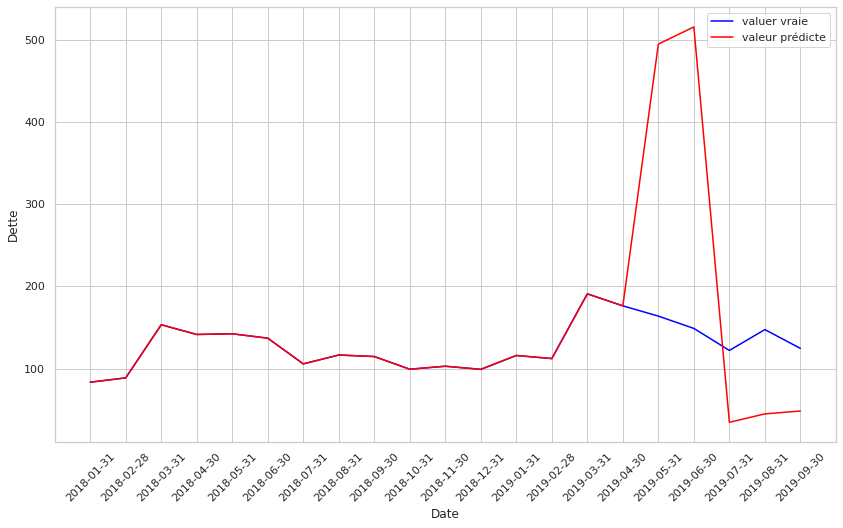

In [ ]:
# size = int(len(MA) * 0.8)
# train, test = MA.iloc[0:size, 0].tolist(), MA.iloc[size:len(MA), 0].tolist()
# dates = ['2018-01-31', '2018-02-28',
#  '2018-03-31', '2018-04-30',
#  '2018-05-31', '2018-06-30',
#  '2018-07-31', '2018-08-31',
#  '2018-09-30', '2018-10-31',
#  '2018-11-30', '2018-12-31',
#  '2019-01-31', '2019-02-28',
#  '2019-03-31', '2019-04-30',
#  '2019-05-31', '2019-06-30',
#  '2019-07-31', '2019-08-31',
#  '2019-09-30']

# history = [x for x in train]
# predictions = list()
# error = 0
# for t in range(len(test)) :
#     model = AR(history)
#     model_fit = model.fit() 
#     output = model_fit.predict(size+t, size+t+1)
#     print(output)
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     error += np.square(yhat - obs)

# print(np.sqrt(error))
# fig, ax = plt.subplots(figsize=(14, 8))
# plt.plot(MA.solde_std.to_list(), color="blue")
# plt.plot(train + predictions, color="red")
# plt.legend(["valuer vraie", "valeur prédicte"])
# plt.xlabel("Date")
# plt.ylabel("Dette")
# ax.set_xticks(range(21))
# ax.set_xticklabels(dates)
# plt.xticks(rotation=45)
# plt.show()

### IV - Auto Regression

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
for i in range(10) :
    model = AutoReg(MA.solde_std.to_list(), lags=i).fit()
    print(f"lags = {i}, aic = {model.aic}")

lags = 0, aic = 6.863076776062077
lags = 1, aic = 6.556995190467064
lags = 2, aic = 6.6819686653869415
lags = 3, aic = 6.58888758381636
lags = 4, aic = 6.745302145699488
lags = 5, aic = 6.910501284560703
lags = 6, aic = 7.112215547116489
lags = 7, aic = 7.269575238629514
lags = 8, aic = 7.387309112802336
lags = 9, aic = 7.527444046506607


32.794588887466034


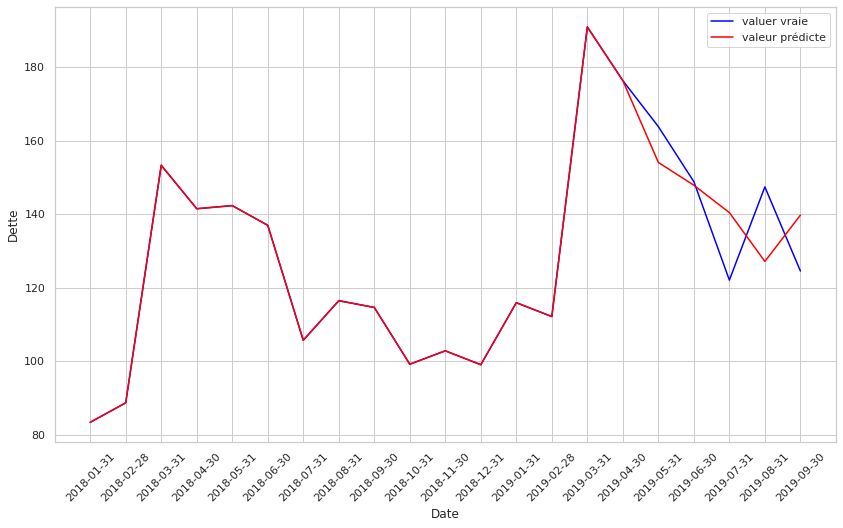

In [ ]:
predictions = list()
model = AutoReg(MA.solde_std.to_list(), lags=1).fit()
output = model.model.predict(model.params, start=size, end=len(MA.solde_std.to_list())-)
predictions.extend(output)
error = np.sum(np.square(np.array(test) - np.array(output[0:len(test)])))
print(np.sqrt(error))

fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(MA.solde_std.to_list(), color="blue")
plt.plot(train + predictions, color="red")
plt.legend(["valuer vraie", "valeur prédicte"])
plt.xlabel("Date")
plt.ylabel("Dette")
ax.set_xticks(range(21))
ax.set_xticklabels(dates)
plt.xticks(rotation=45)
plt.show()

[155.77210313 145.01754262]
[150.91124155 143.78200678]
[142.37098556 138.84424415]
[126.68558828 129.12185671]
[140.87580892 137.52535918]
34.3427054987751


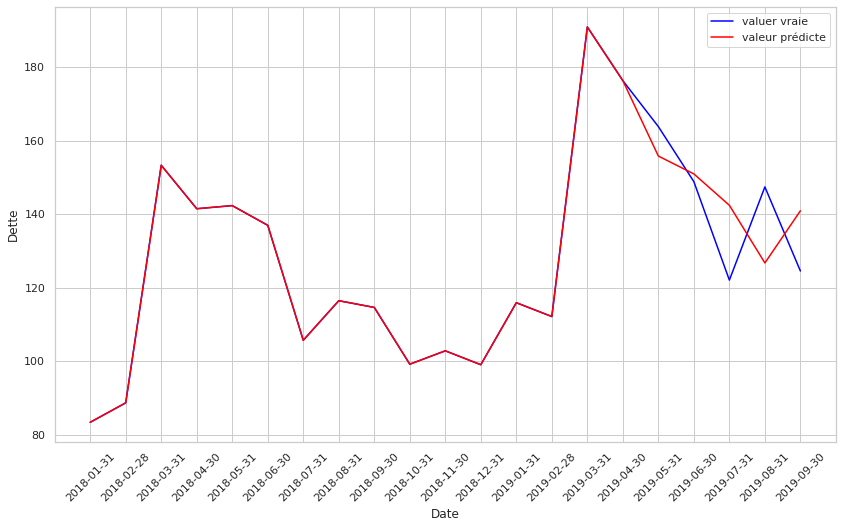

In [ ]:
size = int(len(MA) * 0.8)
train, test = MA.iloc[0:size, 0].tolist(), MA.iloc[size:len(MA), 0].tolist()
dates = ['2018-01-31', '2018-02-28',
 '2018-03-31', '2018-04-30',
 '2018-05-31', '2018-06-30',
 '2018-07-31', '2018-08-31',
 '2018-09-30', '2018-10-31',
 '2018-11-30', '2018-12-31',
 '2019-01-31', '2019-02-28',
 '2019-03-31', '2019-04-30',
 '2019-05-31', '2019-06-30',
 '2019-07-31', '2019-08-31',
 '2019-09-30']

history = [x for x in train]
predictions = list()
error = 0
for t in range(len(test)) :
    model = AutoReg(history, lags=1)
    model_fit = model.fit() 
    output = model_fit.predict(size+t, size+t+1)
    print(output)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    error += np.square(yhat - obs)

print(np.sqrt(error))

fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(MA.solde_std.to_list(), color="blue")
plt.plot(train + predictions, color="red")
plt.legend(["valuer vraie", "valeur prédicte"])
plt.xlabel("Date")
plt.ylabel("Dette")
ax.set_xticks(range(21))
ax.set_xticklabels(dates)
plt.xticks(rotation=45)
plt.show()

# III - VAR & SARIMA

In [ ]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
from statsmodels.tsa.stattools import acf
result_acf=acf(MA["solde_std"])
print(pd.DataFrame({"lag":range(21),"acf":result_acf}).iloc[:,:])

    lag       acf
0     0  1.000000
1     1  0.496300
2     2  0.175968
3     3 -0.046859
4     4 -0.238242
5     5 -0.169400
6     6 -0.219843
7     7 -0.189732
8     8 -0.182946
9     9 -0.016763
10   10  0.098992
11   11  0.161166
12   12  0.245253
13   13 -0.012013
14   14 -0.201406
15   15 -0.172456
16   16 -0.141774
17   17 -0.015233
18   18 -0.035613
19   19 -0.044419
20   20  0.009019


# TAR - 

https://stats.stackexchange.com/questions/135061/best-method-for-short-time-series